In [10]:
%matplotlib inline

In [11]:
from trajja.finance import load_settleup_transactions, filter_df_groceries,viz_agg_yearly_expenses,viz_agg_monthly_expenses,viz_mean_monthly_expense,viz_agg_expenditure_breakdown,viz_mean_daily_expense, str_to_date, coeliac_adjustment, agg_monthly_expenses,agg_yearly_expenses
from typing import Union

In [12]:
# Configuration
DATE_FROM: str = '2020-12-04'
DATE_TO: Union[str, None] = '2022-12-31'
COELIAC_DATE: str = '2022-11-01'
COELIAC_ADJ_AMOUNT: float = 65
MONTHLY_BUDGET: float = 350
FILEPATH: str = '../../data/transactions_10.01.2023.csv'
KEYWORDS_GROCERIES: list = [
    'haxix', 'pavi', 'lidl', 'crunchy', 'cherries', 'laham', 'kerubin', 'dave', 'master',
    'groceries', 'food', 'maypole', 'boucheri', 'emelda', 'convenience', 'miracle',
    'bacon', 'greens', 'mgarr', 'towers', 'spar', 'smart', 'Toiletries', 'bee'
]

KEYWORDS_IGNORE: list = ['chairs']
KEYWORDS_REMOVE: list = [' xirja', ' groceries', 'groceries ', 'supermarket', ' luqa', ' qormi', ' \+ chinese']

In [13]:
# Load and pre-processes the data
data_df = load_settleup_transactions(filepath=FILEPATH, date_from=str_to_date(DATE_FROM),
                                         date_to=str_to_date(DATE_TO))
# Filter only groceries entries
f_df = filter_df_groceries(data_df, on_column='Purpose', keywords=KEYWORDS_GROCERIES,
                           keywords_ignore=KEYWORDS_IGNORE, keywords_remove=KEYWORDS_REMOVE)
# Add coeliac government vouchers
f_df = coeliac_adjustment(f_df, str_to_date(COELIAC_DATE), c_adj_amount=COELIAC_ADJ_AMOUNT,
                          date_to=str_to_date(DATE_TO))

/Users/denis/Development/trajja/trajja/finance.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_df[on_column] = filtered_df[on_column].str.replace(keywords_remove, "")
INFO:root:Found 264 entries for groceries from 527 entries
INFO:root:Added 2 new entries representing 2 months with Coeliac Government Voucher


In [14]:
# Aggregate the data - monthly
agg_m_df = agg_monthly_expenses(f_df)

In [15]:
# Aggregate the data - yearly
agg_y_df = agg_yearly_expenses(f_df)


Monthly expenditure on Groceries
    Year  Month  Amount  daily_mean  daily_std
0   2020     12  376.66   34.241818  26.629541
1   2021      1  257.72   42.953333  33.064519
2   2021      2  168.17   28.028333  19.689867
3   2021      3  303.75   25.312500  24.953268
4   2021      4  315.35   26.279167  20.689947
5   2021      5  120.79   30.197500  20.732523
6   2021      6  261.85   37.407143  25.110792
7   2021      7  318.72   39.840000  17.062495
8   2021      8  304.49   27.680909  22.679912
9   2021      9  315.31   31.531000  21.251065
10  2021     10  107.85   17.975000  14.082827
11  2021     11  207.02   17.251667   9.254109
12  2021     12  331.07   25.466923  24.642945
13  2022      1  248.17   16.544667  12.432985
14  2022      2  213.89   26.736250  14.783243
15  2022      3  377.99   22.234706  15.896589
16  2022      4  263.93   43.988333  31.633238
17  2022      5  359.26   25.661429  23.162466
18  2022      6  322.08   23.005714  20.504860
19  2022      7  262.28   

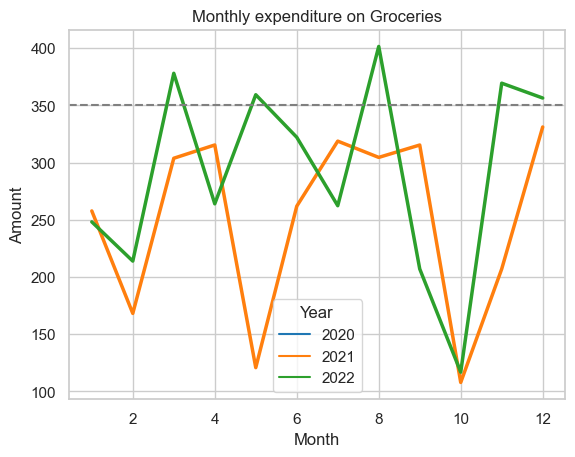

In [16]:
# Visualise - Monthly expenditure on groceries
viz_agg_monthly_expenses(agg_m_df, budget=MONTHLY_BUDGET, title='Monthly expenditure on Groceries')


Top 10: Groceries for 2022
            Purpose  Amount
26             lidl  957.08
37             pavi  853.80
36      mosta bacon  196.80
0   COELIAC VOUCHER  130.00
38            pavi   118.60
17            haxix  102.46
16        groceries  100.10
41            smart   92.82
6        cikka food   67.11
22            laham   64.18


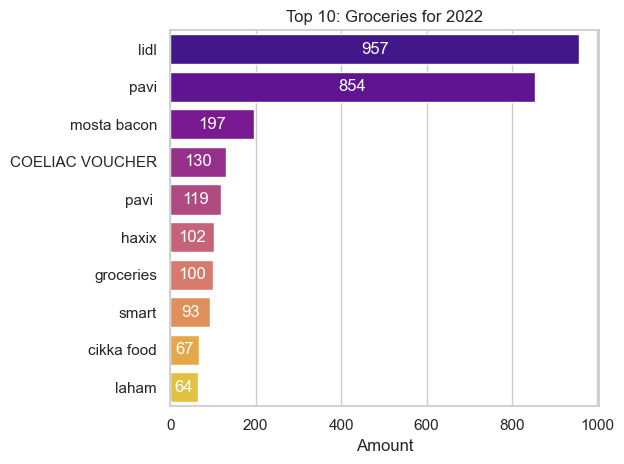

In [17]:
# Visualise - Top 10 groceries
viz_agg_expenditure_breakdown(f_df, title='Top 10: Groceries for 2022', top=10, year=2022)


Yearly total expense (€)
   Year  Amount_expense  Amount_coeliac
0  2020          376.66             NaN
1  2021         3012.09             NaN
2  2022         3498.66           130.0


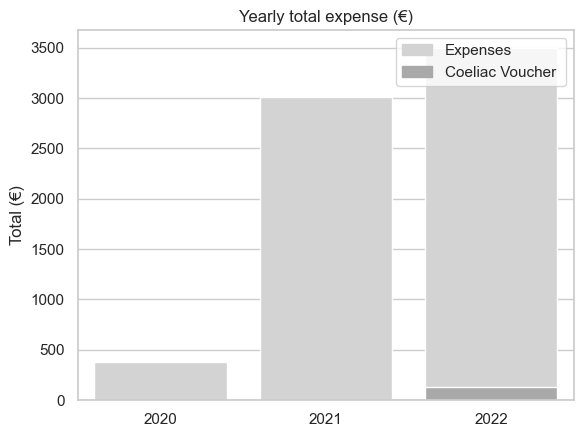

In [18]:
# Visualise - Yearly total expense
viz_agg_yearly_expenses(f_df, 'Yearly total expense (€)')


Monthly mean expenditure
   Year  Monthly_mean  Monthly_std    Change
0  2020      376.6600          NaN       NaN
1  2021      251.0075    80.522239 -0.500593
2  2022      291.5550    86.606041  0.139073


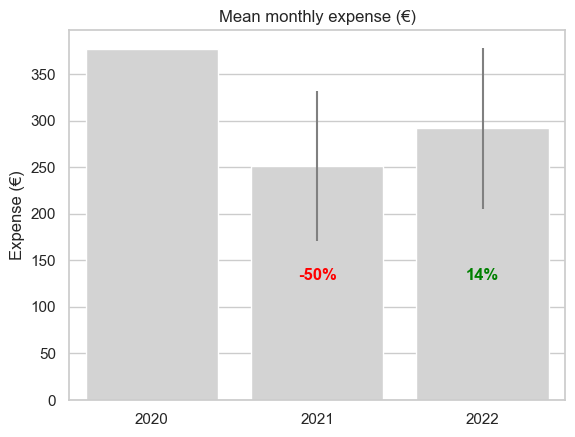

In [19]:
# Visualise - Mean Monthly expenditure
viz_mean_monthly_expense(f_df, 'Mean monthly expense (€)')

Average daily expense is: €27.20


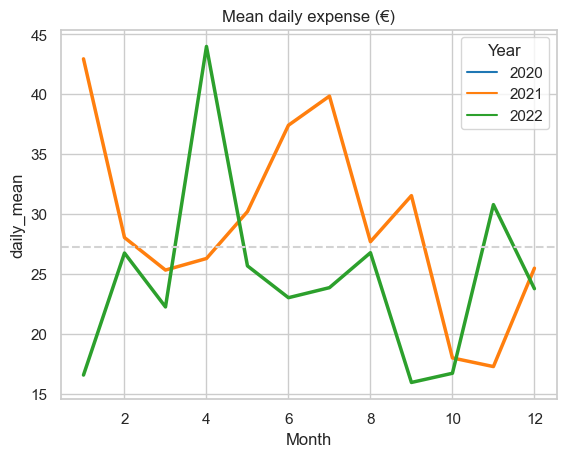

In [20]:
# Visualise - Mean daily expenditure
viz_mean_daily_expense(agg_m_df, 'Mean daily expense (€)')